In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append("/./palin")

from palin.kernels import classification_images

In [5]:
# List to hold individual dataframes
input_folder = "/home/paige/Documents/vocal_ambiguity/interspeech/revcor_avc/data/japanese_l1/phrase"
dataframes = []
# Iterate through all files in the folder
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_folder, filename)
        print(f"Reading {file_path}...")
        
        # Read each CSV file and append to the list of dataframes
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Concatenate all dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined dataframe to a new CSV file
combined_df.to_csv("/home/paige/Documents/vocal_ambiguity/interspeech/revcor_avc/data/japanese_l1/phrase/combined_phrase_japanese", index=False)


Reading /home/paige/Documents/vocal_ambiguity/interspeech/revcor_avc/data/japanese_l1/phrase/YAY(1).csv...
Reading /home/paige/Documents/vocal_ambiguity/interspeech/revcor_avc/data/japanese_l1/phrase/YUS.csv...
Reading /home/paige/Documents/vocal_ambiguity/interspeech/revcor_avc/data/japanese_l1/phrase/KUA(1).csv...
Reading /home/paige/Documents/vocal_ambiguity/interspeech/revcor_avc/data/japanese_l1/phrase/NAY(1).csv...
Reading /home/paige/Documents/vocal_ambiguity/interspeech/revcor_avc/data/japanese_l1/phrase/MAN(1).csv...
Reading /home/paige/Documents/vocal_ambiguity/interspeech/revcor_avc/data/japanese_l1/phrase/MIS.csv...
Reading /home/paige/Documents/vocal_ambiguity/interspeech/revcor_avc/data/japanese_l1/phrase/KES(1).csv...
Reading /home/paige/Documents/vocal_ambiguity/interspeech/revcor_avc/data/japanese_l1/phrase/AYT(1).csv...
Reading /home/paige/Documents/vocal_ambiguity/interspeech/revcor_avc/data/japanese_l1/phrase/RIT(1).csv...
Reading /home/paige/Documents/vocal_ambigui

In [10]:
DIRECTORY_PHRASES = "/home/paige/Documents/vocal_ambiguity/interspeech/revcor_avc/data/japanese_l1/phrase/combined_phrase_japanese.csv"
DIRECTORY_WORD = "/home/rosie/Documents/vocal_ambiguity/interspeech/revcor_avc/data/mandarin_l1/word/english/combined_word_mandarin.csv"
L1 = "Japanese L1"

## Phrases

In [22]:
phrase_responses = pd.read_csv(DIRECTORY_PHRASES)

Check response balance

In [23]:
phrase_single_response = phrase_responses.drop_duplicates( 
  subset = ['subj', 'stim'], 
  keep = 'last').reset_index(drop = True)
phrase_single_response['response'].value_counts()

response
0    1995
1    1255
Name: count, dtype: int64

In [24]:
# analysis for pitch
trial_ids=['subj']
kernels_pitch_phrase_diff=classification_images.compute_kernel_diff(phrase_responses,trial_ids,'segment_time','response','pitch')
kernels_pitch_phrase_pill, kernels_pitch_phrase_peel =classification_images.compute_kernel(phrase_responses,trial_ids,'segment_time','response','pitch')

Text(0, 0.5, 'Normalized Pitch Kernel (a.u.)')

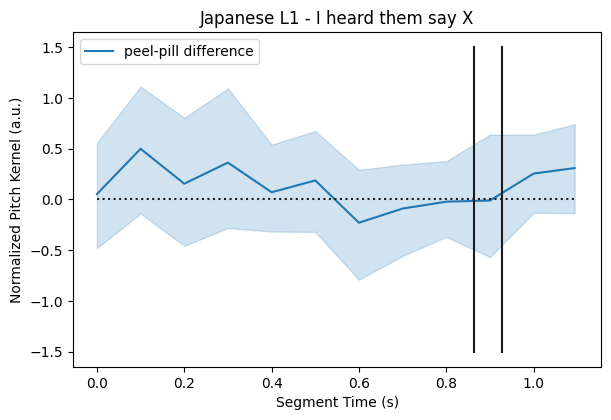

In [25]:
fig = plt.figure(figsize=(15,10))
plt.style.use('default')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)


plt.style.use('default')
ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_pitch_phrase_diff,
                  errorbar=('ci', 95),
                  label="peel-pill difference",
                  ax=ax)
plt.plot([0,1.1],[0,0],color='k',linestyle = ':')
plt.plot([0.864,0.864],[-1.5,1.5],color='k',linestyle = '-')
plt.plot([0.927,0.927],[-1.5,1.5],color='k',linestyle = '-')
plt.title(f"{L1} - I heard them say X")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Pitch Kernel (a.u.)")

Text(0, 0.5, 'Normalized Pitch Kernel (a.u.)')

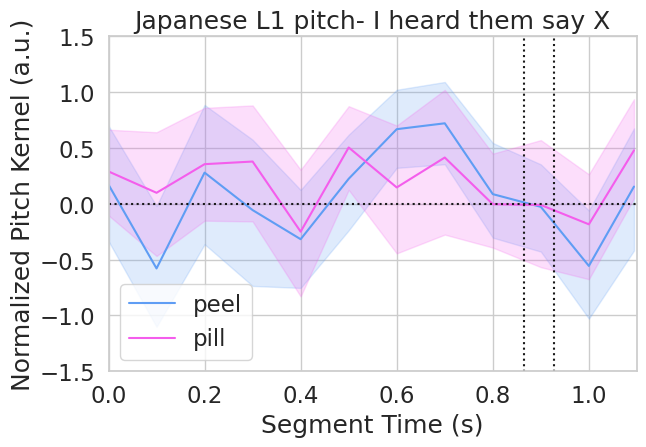

In [26]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
sns.set(font_scale=1.5)
sns.set_palette("husl", 3)
sns.set_palette(sns.husl_palette(h=0.7))
sns.set_style("whitegrid")

ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_pitch_phrase_peel,
                  errorbar=('ci', 95),
                  label="peel",
                  ax=ax)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_pitch_phrase_pill,
                  errorbar=('ci', 95),
                  label="pill",
                  ax=ax)
plt.plot([0,1.1],[0,0],color='k',linestyle = ':')
plt.plot([0.864,0.864],[-2,2],color='k',linestyle = ':')
plt.plot([0.927,0.927],[-2,2],color='k',linestyle = ':')
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0, 1.1)
plt.legend(loc='lower left')
plt.title(f"{L1} pitch- I heard them say X")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Pitch Kernel (a.u.)")

Text(0, 0.5, 'Normalized Pitch Kernel (a.u.)')

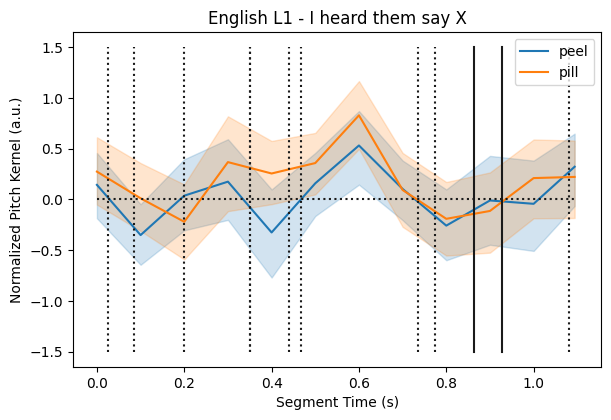

In [31]:
fig = plt.figure(figsize=(15,10))
plt.style.use('default')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)

plt.style.use('default')
ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_pitch_phrase_peel,
                  errorbar=('ci', 95),
                  label="peel",
                  ax=ax)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_pitch_phrase_pill,
                  errorbar=('ci', 95),
                  label="pill",
                  ax=ax)
plt.plot([0,1.1],[0,0],color='k',linestyle = ':')
plt.plot([0.864,0.864],[-1.5,1.5],color='k',linestyle = '-')
plt.plot([0.927,0.927],[-1.5,1.5],color='k',linestyle = '-')
plt.plot([0.026,0.026],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.085, 0.085],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.2, 0.2],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.350, 0.350],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.350, 0.350],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.44, 0.44],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.468, 0.468],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.735, 0.735],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.775, 0.775],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([1.08, 1.08],[-1.5,1.5],color='k',linestyle = ':')
plt.title(f"{L1} - I heard them say X")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Pitch Kernel (a.u.)")

In [32]:
phrase_paired_pitch = classification_images.paired_sample(kernels_pitch_phrase_peel, kernels_pitch_phrase_pill,'segment_time','norm_value')
phrase_paired_pitch

{np.float64(0.0): TtestResult(statistic=np.float64(-0.5904849542328665), pvalue=np.float64(0.5601660935858921), df=np.int64(25)),
 np.float64(0.1): TtestResult(statistic=np.float64(-1.3094392714255179), pvalue=np.float64(0.20229287555896136), df=np.int64(25)),
 np.float64(0.2): TtestResult(statistic=np.float64(1.0951598708829156), pvalue=np.float64(0.28388563472822376), df=np.int64(25)),
 np.float64(0.3): TtestResult(statistic=np.float64(-0.5322970068431705), pvalue=np.float64(0.5992197475342059), df=np.int64(25)),
 np.float64(0.4): TtestResult(statistic=np.float64(-1.8811248811254995), pvalue=np.float64(0.0716511764725392), df=np.int64(25)),
 np.float64(0.5): TtestResult(statistic=np.float64(-0.9473066643416268), pvalue=np.float64(0.3525500126200398), df=np.int64(25)),
 np.float64(0.6): TtestResult(statistic=np.float64(-1.002124024455599), pvalue=np.float64(0.32588529877856476), df=np.int64(25)),
 np.float64(0.7): TtestResult(statistic=np.float64(0.041260458108871675), pvalue=np.float

In [28]:
# analysis for stretch
trial_ids=['subj']
kernels_stretch_phrase_diff=classification_images.compute_kernel_diff(phrase_responses,trial_ids,'segment_time','response','stretch')
kernels_stretch_phrase_peel, kernels_stretch_phrase_pill=classification_images.compute_kernel(phrase_responses,trial_ids,'segment_time','response','stretch')

Text(0, 0.5, 'Normalized Stretch Kernel (a.u.)')

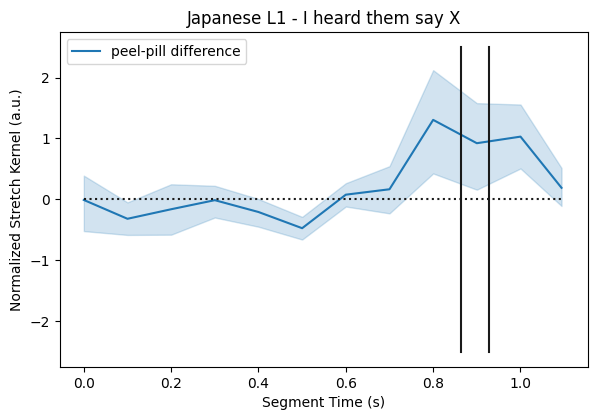

In [29]:
fig = plt.figure(figsize=(15,10))
plt.style.use('default')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)


plt.style.use('default')
ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_stretch_phrase_diff,
                  errorbar=('ci', 95),
                  label="peel-pill difference",
                  ax=ax)
plt.plot([0,1.1],[0,0],color='k',linestyle = ':')
plt.plot([0.864,0.864],[-2.5,2.5],color='k',linestyle = '-')
plt.plot([0.927,0.927],[-2.5,2.5],color='k',linestyle = '-')
plt.title(f"{L1} - I heard them say X")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Stretch Kernel (a.u.)")

Text(0, 0.5, 'Normalized Stretch Kernel (a.u.)')

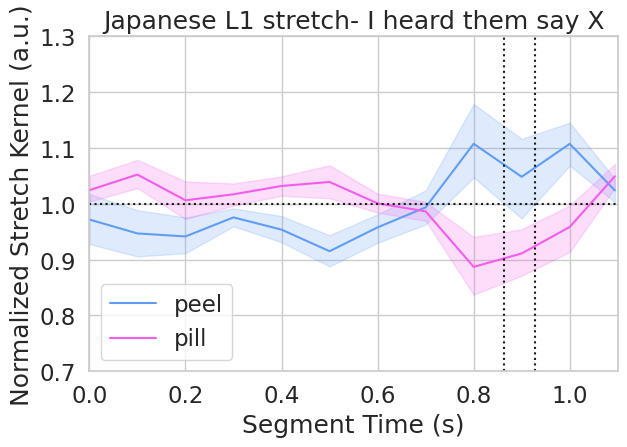

In [30]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
sns.set(font_scale=1.5)
sns.set_palette(sns.husl_palette(h=0.7))
sns.set_style("whitegrid")

ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_stretch_phrase_peel,
                  errorbar=('ci', 95),
                  label="peel",
                  ax=ax)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_stretch_phrase_pill,
                  errorbar=('ci', 95),
                  label="pill",
                  ax=ax)
plt.plot([0,1.1],[1,1],color='k',linestyle = ':')
plt.plot([0.864,0.864],[0.7,1.3],color='k',linestyle = ':')
plt.plot([0.927,0.927],[0.7,1.3],color='k',linestyle = ':')
ax.set_ylim(0.7, 1.3)
ax.set_xlim(0, 1.1)
plt.legend(loc='lower left')
plt.title(f"{L1} stretch- I heard them say X")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Stretch Kernel (a.u.)")

Text(0, 0.5, 'Normalized Stretch Kernel (a.u.)')

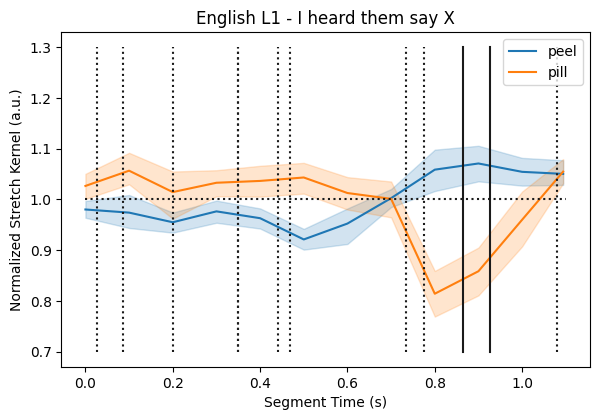

In [38]:
fig = plt.figure(figsize=(15,10))
plt.style.use('default')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)

plt.style.use('default')
ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_stretch_phrase_peel,
                  errorbar=('ci', 95),
                  label="peel",
                  ax=ax)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_stretch_phrase_pill,
                  errorbar=('ci', 95),
                  label="pill",
                  ax=ax)
plt.plot([0,1.1],[1,1],color='k',linestyle = ':')
plt.plot([0.864,0.864],[0.7,1.3],color='k',linestyle = '-')
plt.plot([0.927,0.927],[0.7,1.3],color='k',linestyle = '-')
plt.plot([0.026,0.026],[0.7,1.3],color='k',linestyle = ':')
plt.plot([0.085, 0.085],[0.7,1.3],color='k',linestyle = ':')
plt.plot([0.2, 0.2],[0.7,1.3],color='k',linestyle = ':')
plt.plot([0.350, 0.350],[0.7,1.3],color='k',linestyle = ':')
plt.plot([0.350, 0.350],[0.7,1.3],color='k',linestyle = ':')
plt.plot([0.44, 0.44],[0.7,1.3],color='k',linestyle = ':')
plt.plot([0.468, 0.468],[0.7,1.3],color='k',linestyle = ':')
plt.plot([0.735, 0.735],[0.7,1.3],color='k',linestyle = ':')
plt.plot([0.775, 0.775],[0.7,1.3],color='k',linestyle = ':')
plt.plot([1.08, 1.08],[0.7,1.3],color='k',linestyle = ':')
plt.title(f"{L1} - I heard them say X")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Stretch Kernel (a.u.)")

In [39]:
phrase_paired_stretch = classification_images.paired_sample(kernels_stretch_phrase_peel, kernels_stretch_phrase_pill,'segment_time','norm_value')
phrase_paired_stretch

{np.float64(0.0): TtestResult(statistic=np.float64(-2.676604056044896), pvalue=np.float64(0.012939240429430237), df=np.int64(25)),
 np.float64(0.1): TtestResult(statistic=np.float64(-3.3903729918067955), pvalue=np.float64(0.0023218079228496634), df=np.int64(25)),
 np.float64(0.2): TtestResult(statistic=np.float64(-2.11632866258993), pvalue=np.float64(0.044446994186889216), df=np.int64(25)),
 np.float64(0.3): TtestResult(statistic=np.float64(-3.0160186819847943), pvalue=np.float64(0.005810010275828583), df=np.int64(25)),
 np.float64(0.4): TtestResult(statistic=np.float64(-3.646186122096443), pvalue=np.float64(0.0012216021119771346), df=np.int64(25)),
 np.float64(0.5): TtestResult(statistic=np.float64(-5.659826131537697), pvalue=np.float64(6.834302859172665e-06), df=np.int64(25)),
 np.float64(0.6): TtestResult(statistic=np.float64(-2.2824230437950117), pvalue=np.float64(0.03123875148953699), df=np.int64(25)),
 np.float64(0.7): TtestResult(statistic=np.float64(0.05867033048614213), pvalue

## WORD

In [50]:
# 2nd analysis, words
word_responses  = pd.read_csv(DIRECTORY_WORD)

In [47]:
word_single_response = word_responses.drop_duplicates( 
  subset = ['subj', 'stim'], 
  keep = 'last').reset_index(drop = True)
word_single_response['response'].value_counts()

In [51]:
# analysis for pitch
trial_ids=['subj']
kernels_pitch_word_diff=classification_images.compute_kernel_diff(word_responses,trial_ids,'segment_time','response','pitch')
kernels_pitch_word_peel, kernels_pitch_word_pill=classification_images.compute_kernel(word_responses,trial_ids,'segment_time','response','pitch')

In [56]:
kernels_pitch_word_diff = kernels_pitch_word_diff.round(5)
kernels_pitch_word_diff = kernels_pitch_word_diff.drop_duplicates( 
  subset = ['subj', 'segment_time'], 
  keep = 'first').reset_index(drop = True)
kernels_pitch_word_peel = kernels_pitch_word_peel.round(5)
kernels_pitch_word_peel = kernels_pitch_word_peel.drop_duplicates( 
  subset = ['subj', 'segment_time'], 
  keep = 'first').reset_index(drop = True)
kernels_pitch_word_pill = kernels_pitch_word_pill.round(5)
kernels_pitch_word_pill = kernels_pitch_word_pill.drop_duplicates( 
  subset = ['subj', 'segment_time'], 
  keep = 'first').reset_index(drop = True)

Text(0, 0.5, 'Normalized Pitch Kernel (a.u.)')

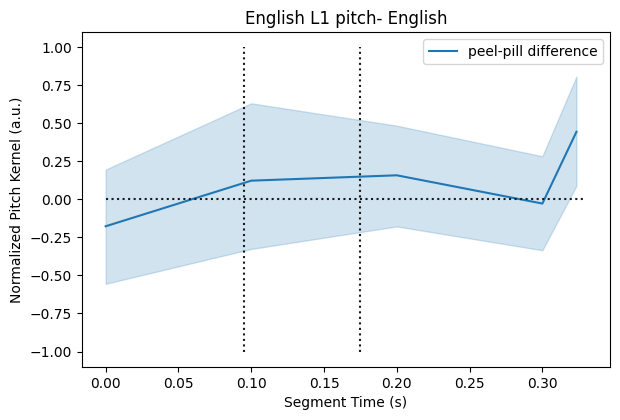

In [57]:
fig = plt.figure(figsize=(15,10))
plt.style.use('default')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)


plt.style.use('default')
ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_pitch_word_diff,
                  errorbar=('ci', 95),
                  label="peel-pill difference",
                  ax=ax)
plt.plot([0,0.33],[0,0],color='k',linestyle = ':')
plt.plot([0.095,0.095],[-1,1],color='k',linestyle = ':')
plt.plot([0.175,0.175],[-1,1],color='k',linestyle = ':')
plt.title(f"{L1} pitch- English")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Pitch Kernel (a.u.)")

Text(0, 0.5, 'Normalized Pitch Kernel (a.u.)')

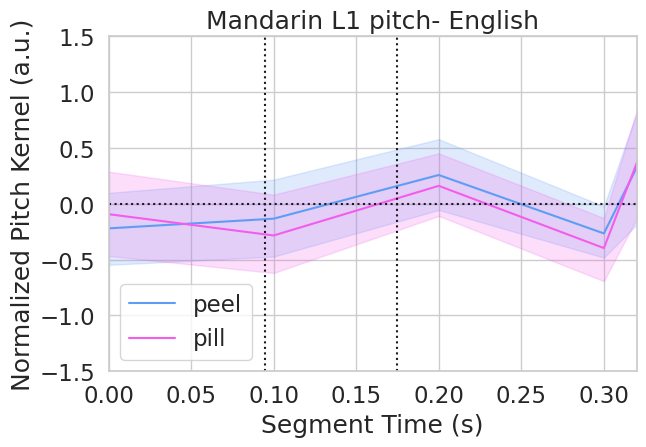

In [60]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
sns.set(font_scale=1.5)
sns.set_palette(sns.husl_palette(h=0.7))
sns.set_style("whitegrid")

ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_pitch_word_peel,
                  errorbar=('ci', 95),
                  label="peel",
                  ax=ax)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_pitch_word_pill,
                  errorbar=('ci', 95),
                  label="pill",
                  ax=ax)
plt.plot([0,0.33],[0,0],color='k',linestyle = ':')
plt.plot([0.095,0.095],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.175,0.175],[-1.5,1.5],color='k',linestyle = ':')
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0, 0.32)
plt.legend(loc='lower left')
plt.title(f"{L1} pitch- English")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Pitch Kernel (a.u.)")

In [61]:
word_paired_pitch = classification_images.paired_sample(kernels_pitch_word_peel, kernels_pitch_word_pill,'segment_time','norm_value')
word_paired_pitch

{np.float64(0.0): TtestResult(statistic=np.float64(-0.42952627085604084), pvalue=np.float64(0.6712196127592267), df=np.int64(25)),
 np.float64(0.1): TtestResult(statistic=np.float64(0.5057610551482955), pvalue=np.float64(0.6174549985393113), df=np.int64(25)),
 np.float64(0.2): TtestResult(statistic=np.float64(0.39826133554171605), pvalue=np.float64(0.6938184411238788), df=np.int64(25)),
 np.float64(0.3): TtestResult(statistic=np.float64(0.6520681501755072), pvalue=np.float64(0.5203078556323153), df=np.int64(25)),
 np.float64(0.32342): TtestResult(statistic=np.float64(-0.19415884747026727), pvalue=np.float64(0.8476205696400266), df=np.int64(25))}

In [65]:
# analysis for stretch
trial_ids=['subj']
kernels_stretch_word_diff=classification_images.compute_kernel_diff(word_responses,trial_ids,'segment_time','response','stretch')
kernels_stretch_word_peel, kernels_stretch_word_pill=classification_images.compute_kernel(word_responses,trial_ids,'segment_time','response','stretch')

In [66]:
kernels_stretch_word_diff = kernels_stretch_word_diff.round(5)
kernels_stretch_word_diff = kernels_stretch_word_diff.drop_duplicates( 
  subset = ['subj', 'segment_time'], 
  keep = 'first').reset_index(drop = True)
kernels_stretch_word_peel = kernels_stretch_word_peel.round(5)
kernels_stretch_word_peel = kernels_stretch_word_peel.drop_duplicates( 
  subset = ['subj', 'segment_time'], 
  keep = 'first').reset_index(drop = True)
kernels_stretch_word_pill = kernels_stretch_word_pill.round(5)
kernels_stretch_word_pill = kernels_stretch_word_pill.drop_duplicates( 
  subset = ['subj', 'segment_time'], 
  keep = 'first').reset_index(drop = True)

Text(0, 0.5, 'Normalized Stretch Kernel (a.u.)')

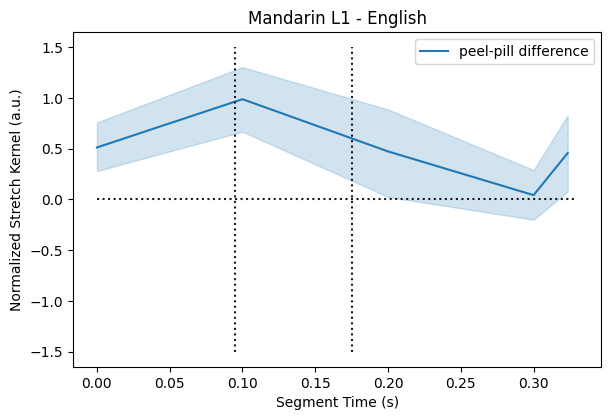

In [67]:
fig = plt.figure(figsize=(15,10))
plt.style.use('default')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)


plt.style.use('default')
ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_stretch_word_diff,
                  errorbar=('ci', 95),
                  label="peel-pill difference",
                  ax=ax)
plt.plot([0,0.33],[0,0],color='k',linestyle = ':')
plt.plot([0.095,0.095],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.175,0.175],[-1.5,1.5],color='k',linestyle = ':')
plt.title(f"{L1} - English")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Stretch Kernel (a.u.)")

Text(0, 0.5, 'Normalized Stretch Kernel (a.u.)')

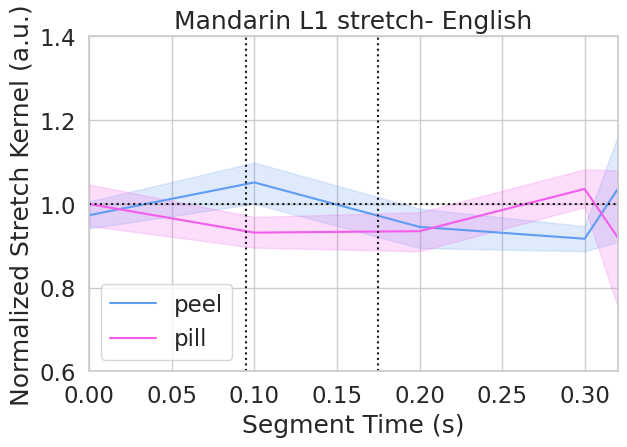

In [68]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
sns.set(font_scale=1.5)
sns.set_palette(sns.husl_palette(h=0.7))
sns.set_style("whitegrid")

ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_stretch_word_peel,
                  errorbar=('ci', 95),
                  label="peel",
                  ax=ax)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_stretch_word_pill,
                  errorbar=('ci', 95),
                  label="pill",
                  ax=ax)
plt.plot([0,0.33],[1,1],color='k',linestyle = ':')
plt.plot([0.095,0.095],[0.6,1.4],color='k',linestyle = ':')
plt.plot([0.175,0.175],[0.6,1.4],color='k',linestyle = ':')
ax.set_ylim(0.6, 1.4)
ax.set_xlim(0, 0.32)
plt.legend(loc='lower left')
plt.title(f"{L1} stretch- English")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Stretch Kernel (a.u.)")

In [69]:
word_paired_stretch = classification_images.paired_sample(kernels_stretch_word_peel, kernels_stretch_word_pill,'segment_time','norm_value')
word_paired_stretch

{np.float64(0.0): TtestResult(statistic=np.float64(-0.7547570962921958), pvalue=np.float64(0.45744636718285847), df=np.int64(25)),
 np.float64(0.1): TtestResult(statistic=np.float64(3.5833231050655243), pvalue=np.float64(0.0014317780733917622), df=np.int64(25)),
 np.float64(0.2): TtestResult(statistic=np.float64(0.25489564118267305), pvalue=np.float64(0.8008888876146998), df=np.int64(25)),
 np.float64(0.3): TtestResult(statistic=np.float64(-3.97434902202687), pvalue=np.float64(0.0005291670328412674), df=np.int64(25)),
 np.float64(0.32342): TtestResult(statistic=np.float64(1.2982604117443741), pvalue=np.float64(0.20604749612513157), df=np.int64(25))}